# Temperature Forecast

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"F:\temperature.csv")

In [3]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

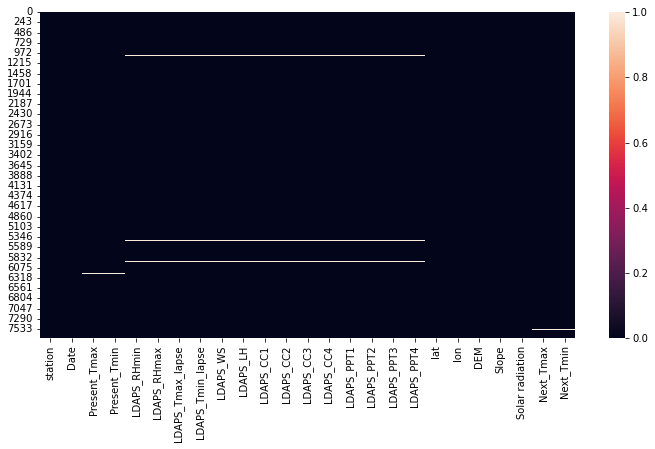

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

In [7]:
df1 = df.dropna()

<AxesSubplot:>

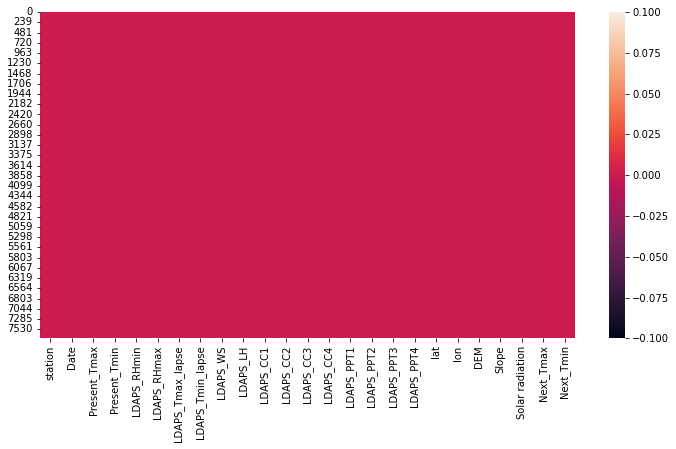

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.isnull())

# EDA 

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

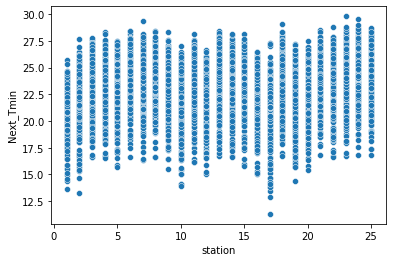

In [9]:
sns.scatterplot(data=df1, x='station', y='Next_Tmin')

<AxesSubplot:xlabel='station', ylabel='Next_Tmax'>

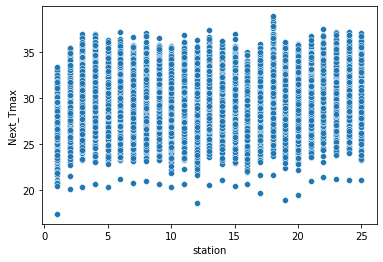

In [10]:
sns.scatterplot(data=df1, x='station', y='Next_Tmax')

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmin'>

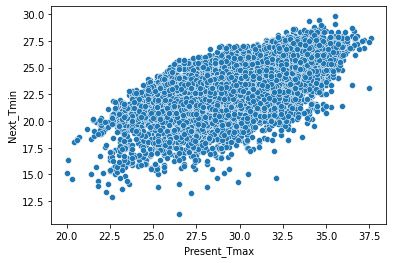

In [11]:
sns.scatterplot(data=df1, x='Present_Tmax', y='Next_Tmin')

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

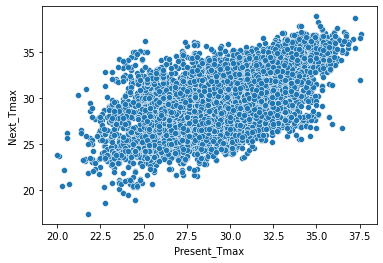

In [12]:
sns.scatterplot(data=df1, x='Present_Tmax', y='Next_Tmax')

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

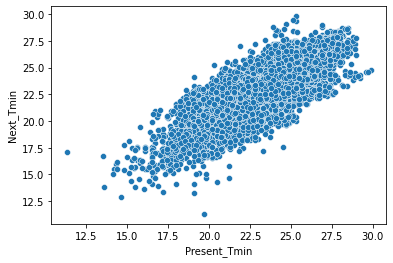

In [13]:
sns.scatterplot(data=df1, x='Present_Tmin', y='Next_Tmin')

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmax'>

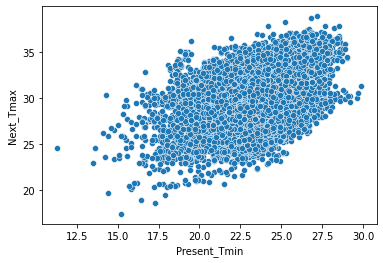

In [14]:
sns.scatterplot(data=df1, x='Present_Tmin', y='Next_Tmax')

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmin'>

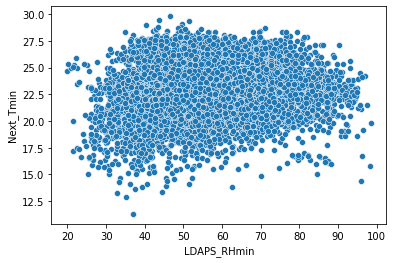

In [15]:
sns.scatterplot(data=df1, x='LDAPS_RHmin', y='Next_Tmin')

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmax'>

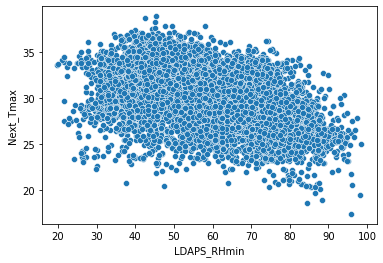

In [16]:
sns.scatterplot(data=df1, x='LDAPS_RHmin', y='Next_Tmax')

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Next_Tmin'>

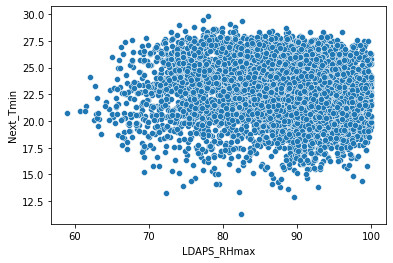

In [17]:
sns.scatterplot(data=df1, x='LDAPS_RHmax', y='Next_Tmin')

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Next_Tmax'>

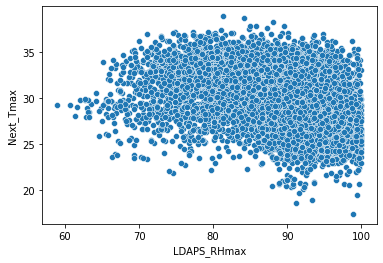

In [18]:
sns.scatterplot(data=df1, x='LDAPS_RHmax', y='Next_Tmax')

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmin'>

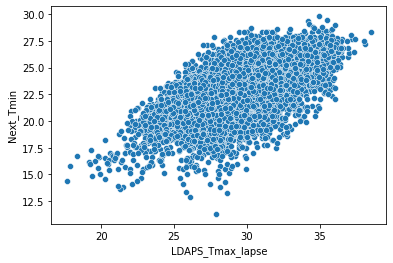

In [19]:
sns.scatterplot(data=df1, x='LDAPS_Tmax_lapse', y='Next_Tmin')

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmax'>

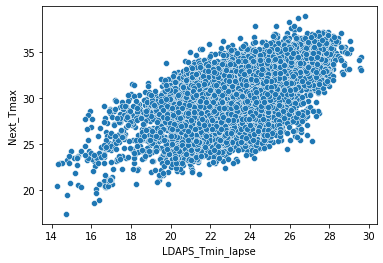

In [20]:
sns.scatterplot(data=df1, x='LDAPS_Tmin_lapse', y='Next_Tmax')

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmin'>

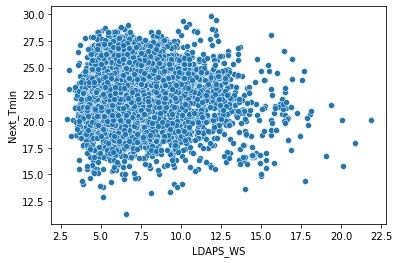

In [21]:
sns.scatterplot(data=df1, x='LDAPS_WS', y='Next_Tmin')

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmax'>

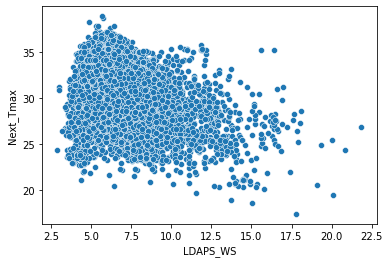

In [22]:
sns.scatterplot(data=df1, x='LDAPS_WS', y='Next_Tmax')

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmin'>

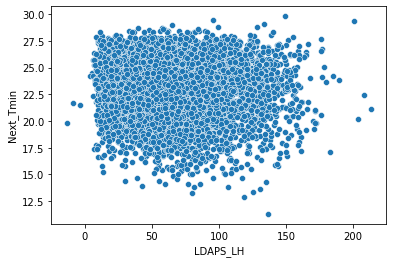

In [23]:
sns.scatterplot(data=df1, x='LDAPS_LH', y='Next_Tmin')

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmax'>

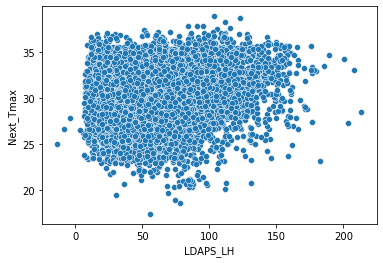

In [24]:
sns.scatterplot(data=df1, x='LDAPS_LH', y='Next_Tmax')

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmin'>

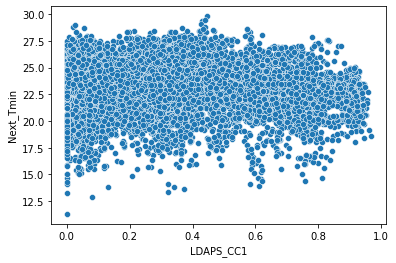

In [25]:
sns.scatterplot(data=df1, x='LDAPS_CC1', y='Next_Tmin')

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmax'>

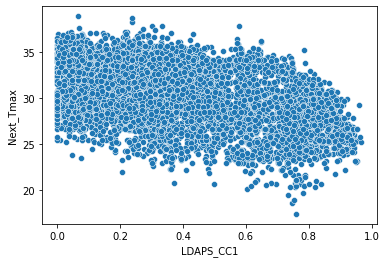

In [26]:
sns.scatterplot(data=df1, x='LDAPS_CC1', y='Next_Tmax')

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Next_Tmin'>

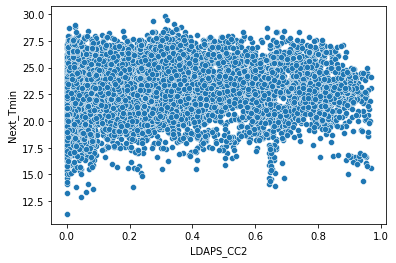

In [27]:
sns.scatterplot(data=df1, x='LDAPS_CC2', y='Next_Tmin')

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Next_Tmax'>

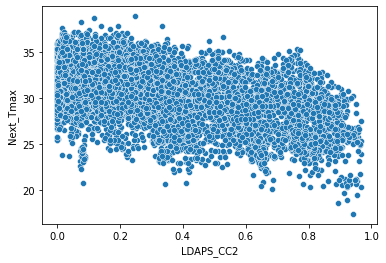

In [28]:
sns.scatterplot(data=df1, x='LDAPS_CC2', y='Next_Tmax')

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Next_Tmin'>

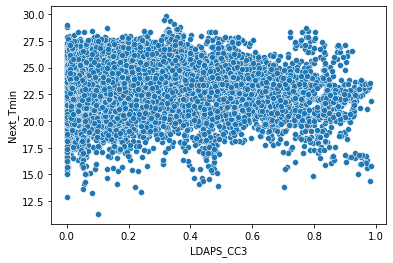

In [29]:
sns.scatterplot(data=df1, x='LDAPS_CC3', y='Next_Tmin')

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Next_Tmax'>

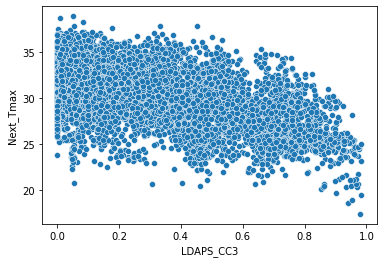

In [30]:
sns.scatterplot(data=df1, x='LDAPS_CC3', y='Next_Tmax')

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmin'>

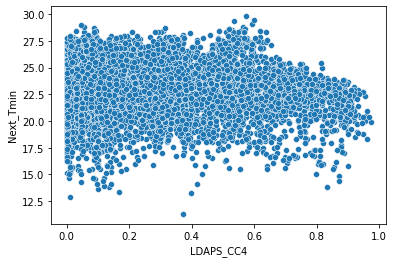

In [31]:
sns.scatterplot(data=df1, x='LDAPS_CC4', y='Next_Tmin')

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmax'>

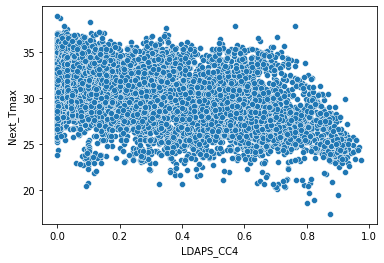

In [32]:
sns.scatterplot(data=df1, x='LDAPS_CC4', y='Next_Tmax')

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Next_Tmin'>

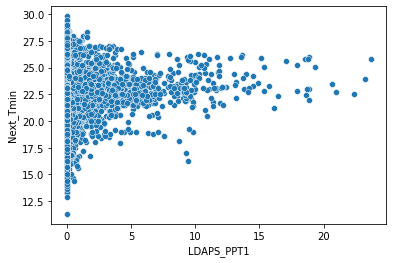

In [33]:
sns.scatterplot(data=df1, x='LDAPS_PPT1', y='Next_Tmin')

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Next_Tmax'>

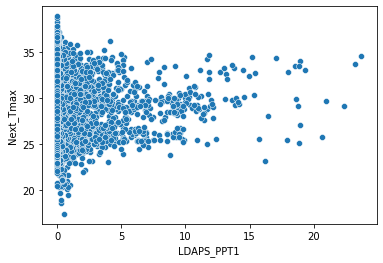

In [34]:
sns.scatterplot(data=df1, x='LDAPS_PPT1', y='Next_Tmax')

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Next_Tmin'>

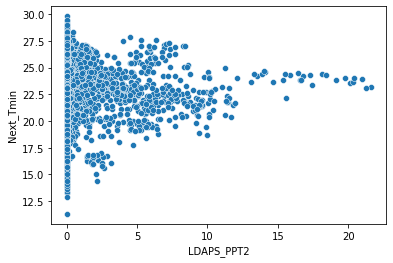

In [35]:
sns.scatterplot(data=df1, x='LDAPS_PPT2', y='Next_Tmin')

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Next_Tmax'>

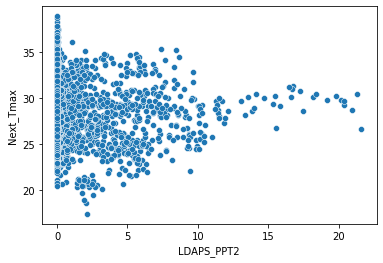

In [36]:
sns.scatterplot(data=df1, x='LDAPS_PPT2', y='Next_Tmax')

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Next_Tmin'>

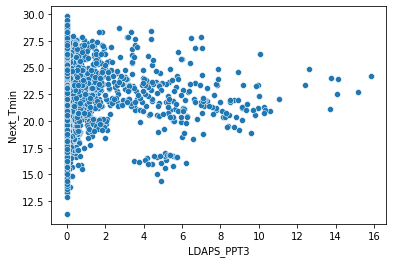

In [37]:
sns.scatterplot(data=df1, x='LDAPS_PPT3', y='Next_Tmin')

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Next_Tmax'>

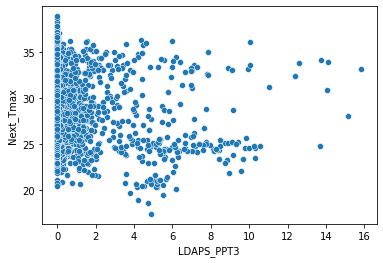

In [38]:
sns.scatterplot(data=df1, x='LDAPS_PPT3', y='Next_Tmax')

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmin'>

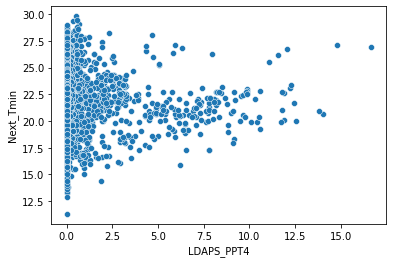

In [39]:
sns.scatterplot(data=df1, x='LDAPS_PPT4', y='Next_Tmin')

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmax'>

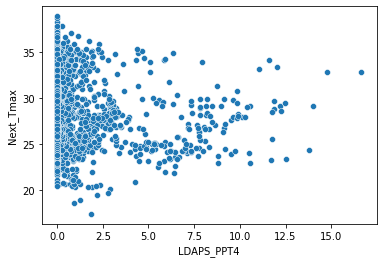

In [40]:
sns.scatterplot(data=df1, x='LDAPS_PPT4', y='Next_Tmax')

<AxesSubplot:xlabel='lat', ylabel='Next_Tmin'>

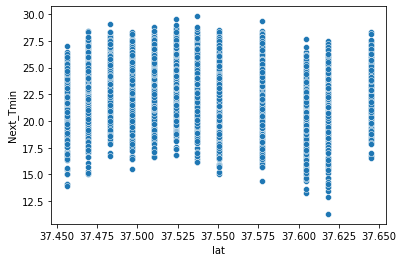

In [41]:
sns.scatterplot(data=df1, x='lat', y='Next_Tmin')

<AxesSubplot:xlabel='lat', ylabel='Next_Tmax'>

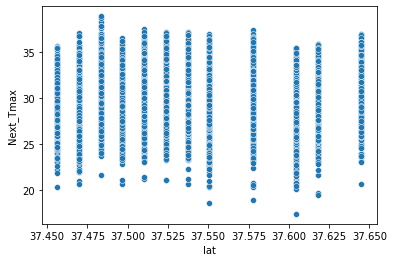

In [42]:
sns.scatterplot(data=df1, x='lat', y='Next_Tmax')

<AxesSubplot:xlabel='lon', ylabel='Next_Tmin'>

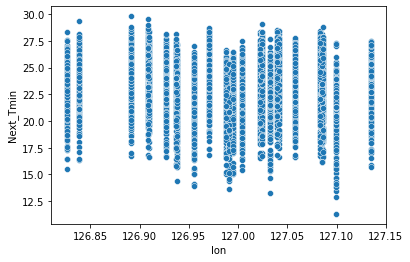

In [43]:
sns.scatterplot(data=df1, x='lon', y='Next_Tmin')

<AxesSubplot:xlabel='lon', ylabel='Next_Tmax'>

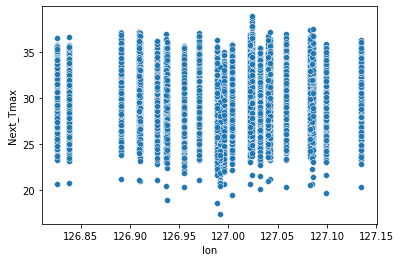

In [44]:
sns.scatterplot(data=df1, x='lon', y='Next_Tmax')

<AxesSubplot:xlabel='DEM', ylabel='Next_Tmin'>

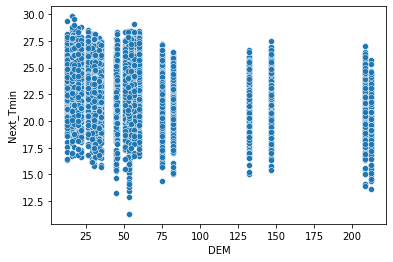

In [45]:
sns.scatterplot(data=df1, x='DEM', y='Next_Tmin')

<AxesSubplot:xlabel='DEM', ylabel='Next_Tmax'>

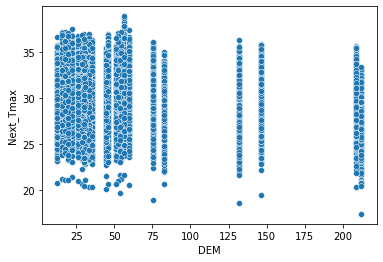

In [46]:
sns.scatterplot(data=df1, x='DEM', y='Next_Tmax')

<AxesSubplot:xlabel='Slope', ylabel='Next_Tmin'>

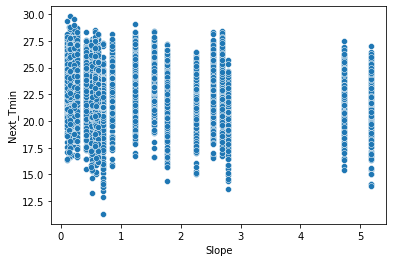

In [47]:
sns.scatterplot(data=df1, x='Slope', y='Next_Tmin')

<AxesSubplot:xlabel='Slope', ylabel='Next_Tmax'>

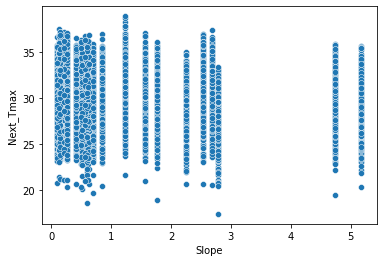

In [48]:
sns.scatterplot(data=df1, x='Slope', y='Next_Tmax')

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmin'>

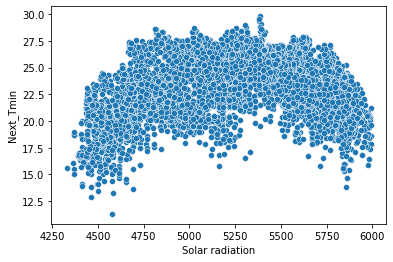

In [49]:
sns.scatterplot(data=df1, x='Solar radiation', y='Next_Tmin')

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmax'>

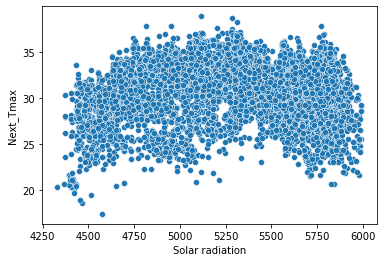

In [50]:
sns.scatterplot(data=df1, x='Solar radiation', y='Next_Tmax')

<AxesSubplot:xlabel='Next_Tmax', ylabel='Next_Tmin'>

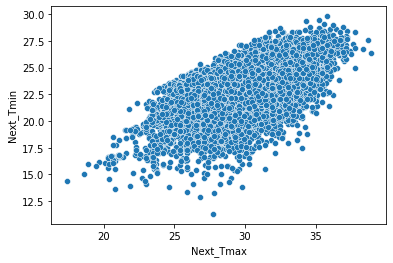

In [51]:
sns.scatterplot(data=df1, x='Next_Tmax', y='Next_Tmin')

<AxesSubplot:xlabel='Next_Tmin', ylabel='Next_Tmax'>

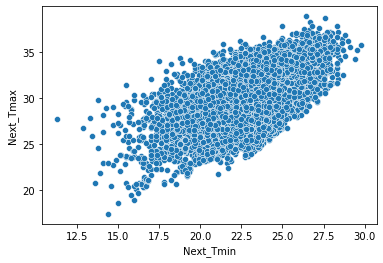

In [52]:
sns.scatterplot(data=df1, x='Next_Tmin', y='Next_Tmax')

# Correlation 

In [53]:
df1.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877


<AxesSubplot:>

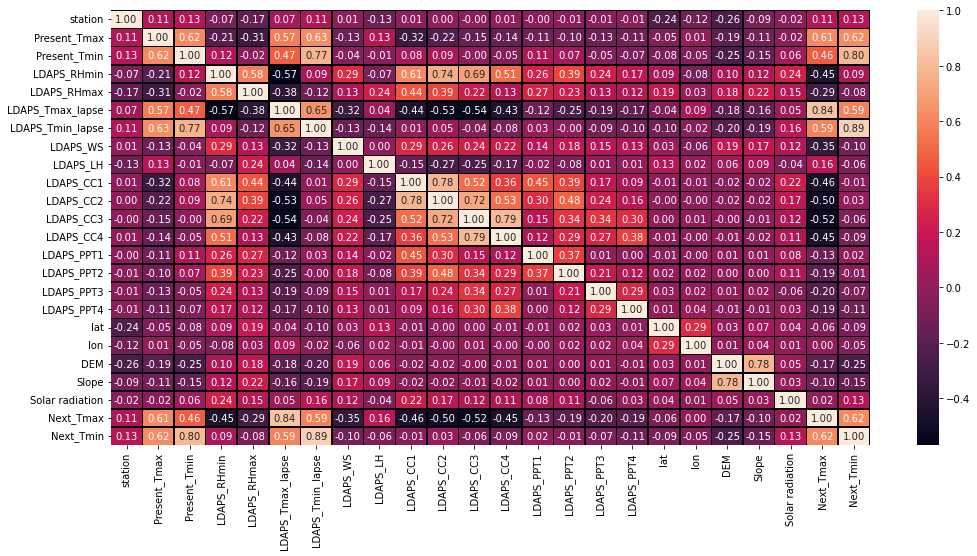

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
sns.heatmap(df1.corr(), annot=True, linewidths=0.5,linecolor="black",fmt='.2f')

# Describing dataset

In [55]:
df1.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


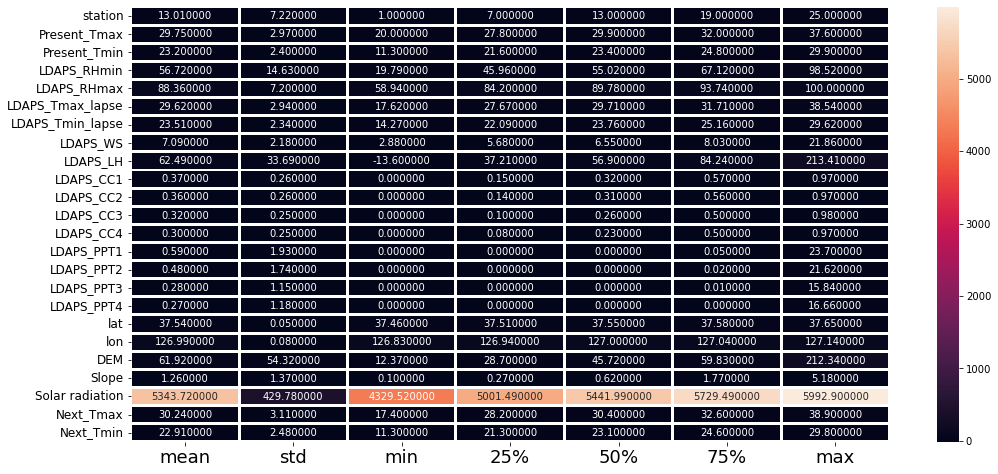

In [56]:
plt.figure(figsize=(17,8))
sns.heatmap(round(df1.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.show()

# Checking Outliers 

station                AxesSubplot(0.125,0.749828;0.0270979x0.130172)
Present_Tmax        AxesSubplot(0.157517,0.749828;0.0270979x0.130172)
Present_Tmin        AxesSubplot(0.190035,0.749828;0.0270979x0.130172)
LDAPS_RHmin         AxesSubplot(0.222552,0.749828;0.0270979x0.130172)
LDAPS_RHmax          AxesSubplot(0.25507,0.749828;0.0270979x0.130172)
LDAPS_Tmax_lapse    AxesSubplot(0.287587,0.749828;0.0270979x0.130172)
LDAPS_Tmin_lapse    AxesSubplot(0.320105,0.749828;0.0270979x0.130172)
LDAPS_WS            AxesSubplot(0.352622,0.749828;0.0270979x0.130172)
LDAPS_LH             AxesSubplot(0.38514,0.749828;0.0270979x0.130172)
LDAPS_CC1           AxesSubplot(0.417657,0.749828;0.0270979x0.130172)
LDAPS_CC2           AxesSubplot(0.450175,0.749828;0.0270979x0.130172)
LDAPS_CC3           AxesSubplot(0.482692,0.749828;0.0270979x0.130172)
LDAPS_CC4            AxesSubplot(0.51521,0.749828;0.0270979x0.130172)
LDAPS_PPT1          AxesSubplot(0.547727,0.749828;0.0270979x0.130172)
LDAPS_PPT2          

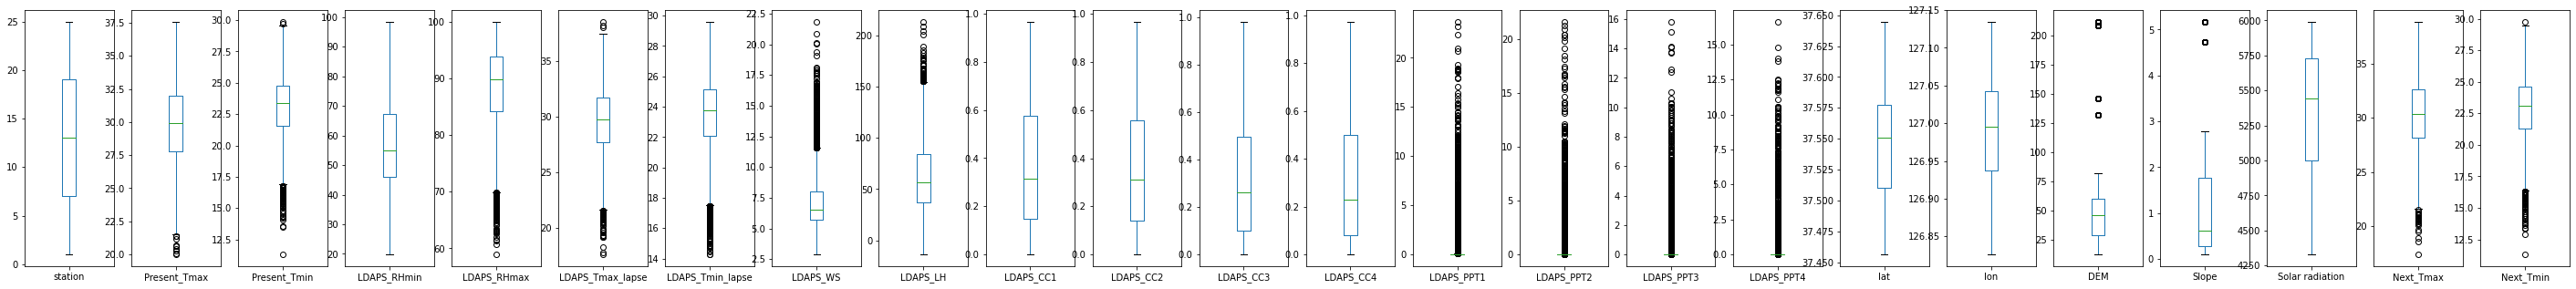

In [57]:
df1.plot(kind='box', subplots=True, layout=(5,24),figsize=(50,30))

# Skewness 

In [58]:
df1.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

<AxesSubplot:xlabel='station', ylabel='Density'>

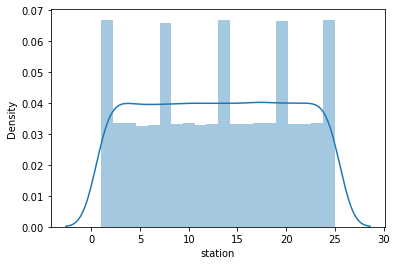

In [59]:
sns.distplot(df1["station"])

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

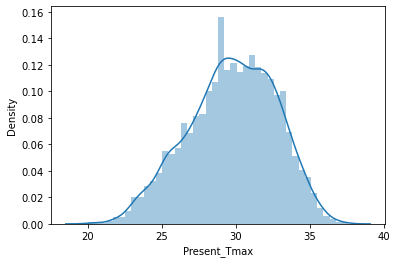

In [60]:
sns.distplot(df1["Present_Tmax"])

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

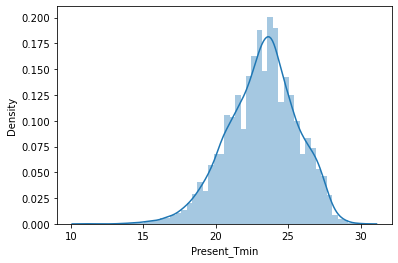

In [61]:
sns.distplot(df1["Present_Tmin"])

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

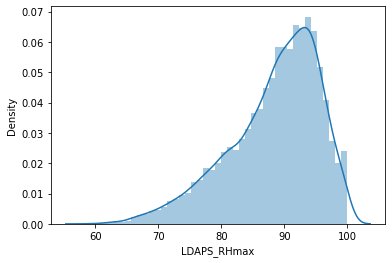

In [62]:
sns.distplot(df1["LDAPS_RHmax"])

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

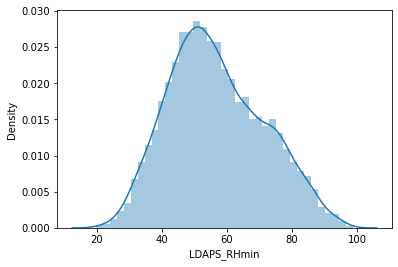

In [63]:
sns.distplot(df1["LDAPS_RHmin"])

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

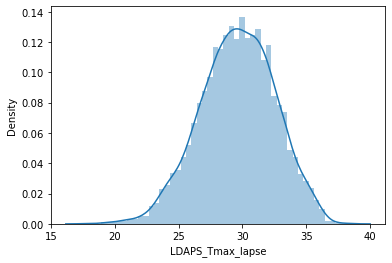

In [64]:
sns.distplot(df1["LDAPS_Tmax_lapse"])

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

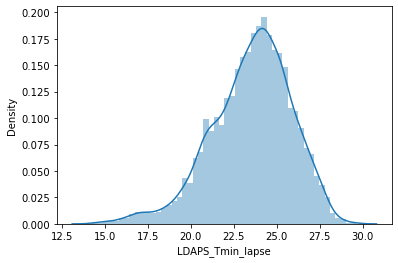

In [65]:
sns.distplot(df1["LDAPS_Tmin_lapse"])

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

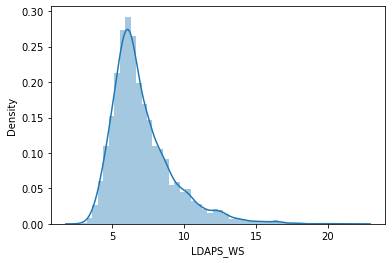

In [66]:
sns.distplot(df1["LDAPS_WS"])

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

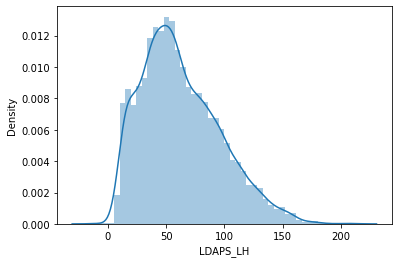

In [67]:
sns.distplot(df1["LDAPS_LH"])

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Density'>

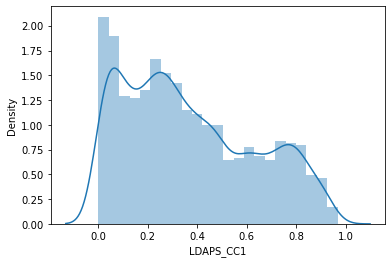

In [68]:
sns.distplot(df1["LDAPS_CC1"])

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Density'>

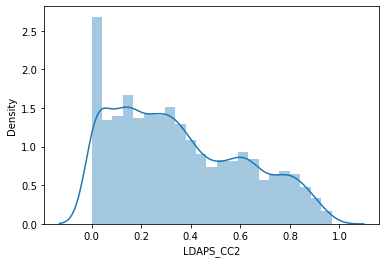

In [69]:
sns.distplot(df1["LDAPS_CC2"])

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

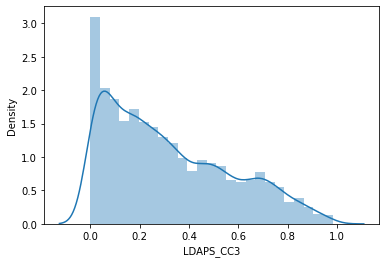

In [70]:
sns.distplot(df1["LDAPS_CC3"])

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

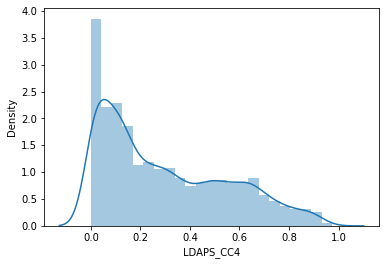

In [71]:
sns.distplot(df1["LDAPS_CC4"])

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

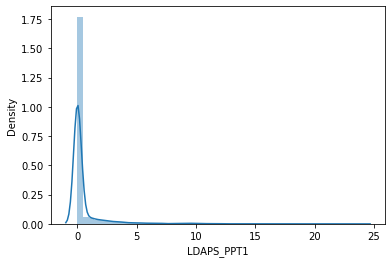

In [72]:
sns.distplot(df1["LDAPS_PPT1"])

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

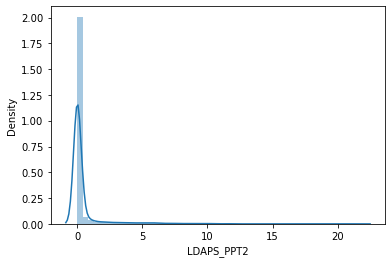

In [73]:
sns.distplot(df1["LDAPS_PPT2"])

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

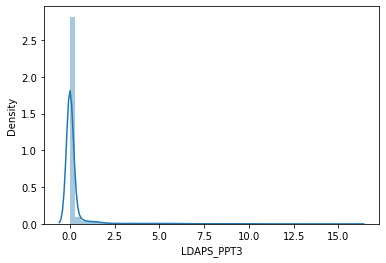

In [74]:
sns.distplot(df1["LDAPS_PPT3"])

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

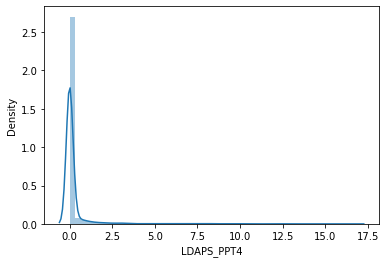

In [75]:
sns.distplot(df1["LDAPS_PPT4"])

<AxesSubplot:xlabel='lat', ylabel='Density'>

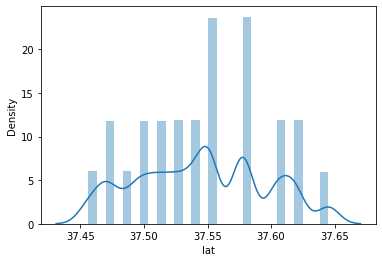

In [76]:
sns.distplot(df1["lat"])

<AxesSubplot:xlabel='lon', ylabel='Density'>

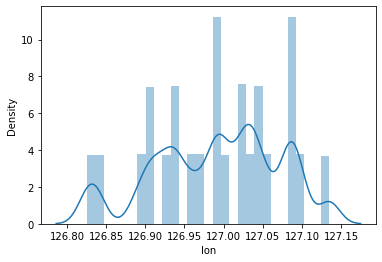

In [77]:
sns.distplot(df1["lon"])

<AxesSubplot:xlabel='DEM', ylabel='Density'>

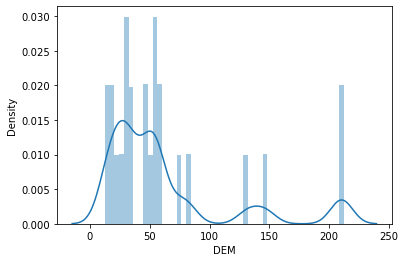

In [78]:
sns.distplot(df1["DEM"])

<AxesSubplot:xlabel='Slope', ylabel='Density'>

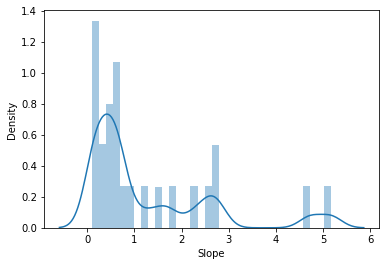

In [79]:
sns.distplot(df1["Slope"])

<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

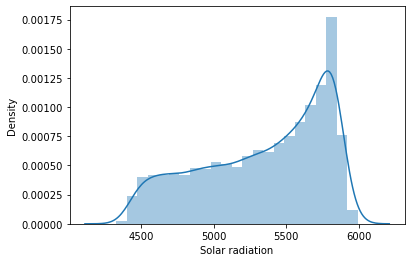

In [80]:
sns.distplot(df1["Solar radiation"])

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

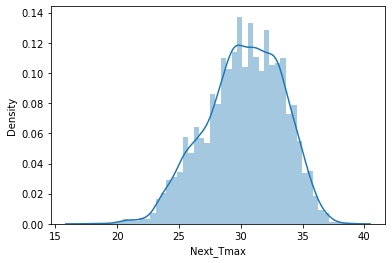

In [81]:
sns.distplot(df1["Next_Tmax"])

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

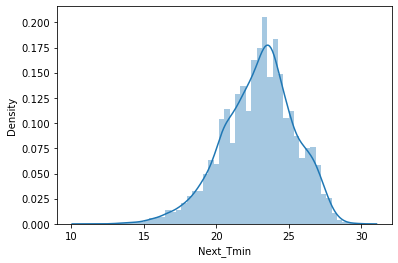

In [82]:
sns.distplot(df1["Next_Tmin"])

In [83]:
delete=pd.DataFrame([["0.016145", "Solar radiation", "No", "Alot"],
                     ["-0.055367", "lat", "No", "Alot"],
                     ["-0.085136", "lat", "No", "Alot"],
                     ["0.003502", "lon", "No", "Alot"],
                     ["-0.068664", "LDAPS_PPT3", "No", "Alot"],
                     ["0.018031", "LDAPS_PPT1", "No", "Alot"],
                     ["-0.086197", "LDAPS_CC4", "No", "Alot"],
                     ["0.030358", "LDAPS_CC2", "No", "Alot"],
                     ["-0.012877", "LDAPS_CC1", "No", "Alot"],
                     ["-0.060392", "LDAPS_LH", "No", "Alot"],
                     ["-0.076415", "LDAPS_RHmax", "No", "Alot"],
                     ["0.093249", "LDAPS_RHmin", "No", "Alot"],
                     ["0.835729", "LDAPS_Tmax_lapse", "No", "Alot"],
                     ["0.796975", "Present_Tmin", "No", "Alot"],
                     ["0.621048", "Present_Tmax", "No", "Alot"],
                     ["0.610357", "Present_Tmax", "No", "Alot"],
                     ["-0.045758", "lon", "No", "Alot"],
                     ["-0.012462", "LDAPS_PPT2", "No", "Alot"],
                     ["0.018031", "LDAPS_PPT1", "No", "Alot"],
                     ["-0.086197", "LDAPS_CC3", "No", "Alot"],
                     ["-0.012462", "LDAPS_CC2", "No", "Alot"],
                     ["-0.056490", "LDAPS_CC3", "No", "Alot"]

                    ],
                    columns=["Correlation with Target", "Column Name", "Normalised", "Outliers"])
delete

,Correlation with Target,Column Name,Normalised,Outliers
0,0.016145,Solar radiation,No,Alot
1,-0.055367,lat,No,Alot
2,-0.085136,lat,No,Alot
3,0.003502,lon,No,Alot
4,-0.068664,LDAPS_PPT3,No,Alot
5,0.018031,LDAPS_PPT1,No,Alot
6,-0.086197,LDAPS_CC4,No,Alot
7,0.030358,LDAPS_CC2,No,Alot
8,-0.012877,LDAPS_CC1,No,Alot
9,-0.060392,LDAPS_LH,No,Alot


In [84]:
df2=df1.drop(['Solar radiation','LDAPS_CC3','LDAPS_CC3', 'LDAPS_CC2','LDAPS_PPT2','LDAPS_PPT1','lon','Present_Tmax','Present_Tmin','LDAPS_Tmax_lapse','LDAPS_RHmin','LDAPS_RHmax','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT3','lat'],axis=1)

In [85]:
df2

,station,Date,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_PPT4,DEM,Slope,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,23.006936,6.818887,0.0,212.3350,2.7850,29.1,21.2
1,2.0,30-06-2013,24.035009,5.691890,0.0,44.7624,0.5141,30.5,22.5
2,3.0,30-06-2013,24.565633,6.138224,0.0,33.3068,0.2661,31.1,23.9
3,4.0,30-06-2013,23.326177,5.650050,0.0,45.7160,2.5348,31.7,24.3
4,5.0,30-06-2013,23.486480,5.735004,0.0,35.0380,0.5055,31.2,22.5
...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,18.303014,6.603253,0.0,26.2980,0.5721,27.6,17.7
7746,22.0,30-08-2017,17.814038,5.768083,0.0,21.9668,0.1332,28.0,17.1
7747,23.0,30-08-2017,18.775678,6.148918,0.0,15.5876,0.1554,28.3,18.1
7748,24.0,30-08-2017,18.733519,6.542819,0.0,17.2956,0.2223,28.6,18.8


In [86]:
df['Next_Tmax'].nunique()

183

In [87]:
#converting float into int 

df2['Next_Tmax']=df2['Next_Tmax'].astype(int)
df2['Next_Tmin']=df2['Next_Tmin'].astype(int)

In [88]:
df2.head()

,station,Date,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_PPT4,DEM,Slope,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,23.006936,6.818887,0.0,212.3350,2.7850,29,21
1,2.0,30-06-2013,24.035009,5.691890,0.0,44.7624,0.5141,30,22
2,3.0,30-06-2013,24.565633,6.138224,0.0,33.3068,0.2661,31,23
3,4.0,30-06-2013,23.326177,5.650050,0.0,45.7160,2.5348,31,24
4,5.0,30-06-2013,23.486480,5.735004,0.0,35.0380,0.5055,31,22


# Train Test Split

In [89]:
X = df2.drop(['Date'],axis=1)
Y = df2['Next_Tmax']

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [91]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (6070, 8)
X_test shape: (1518, 8)
Y_train shape: (6070,)
Y_test shape: (1518,)


# Modelling Data 

In [92]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

In [93]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

MAE: 4.1261094965252196e-15
MSE: 4.376047371992817e-29
RMSE: 6.615169969088335e-15


In [94]:
#DecisionTree Regressor model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
pred=dtr.predict(X_test)

In [95]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

MAE: 0.001976284584980237
MSE: 0.001976284584980237
RMSE: 0.044455422447438706


In [96]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,Y_train)
pred=rdr.predict(X_test)

In [97]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

MAE: 0.002714097496706193
MSE: 0.0022931488801054014
RMSE: 0.04788683409983794


# Model Saving 

In [107]:
import pickle
filename = 'Temperature.pkl'
pickle.dump(lr, open(filename, 'wb')) 